In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
#import seaborn as sns
import tensorflow as tf
#import keras
from tensorflow.keras.preprocessing import image
#from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [2]:
##1
## Importing Modules

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm #just to get the progress bar 
import random
warnings.filterwarnings('ignore')

%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D ,Dropout, Flatten, MaxPooling2D, Input


In [3]:
train_dir = r"C:\Users\Gabriel\Documents\Inge-2I\WebScrapping\MasterProject_GIV\EmotionDetector\EmotionDatasets\train" #passing the path with training images
test_dir = r"C:\Users\Gabriel\Documents\Inge-2I\WebScrapping\MasterProject_GIV\EmotionDetector\EmotionDatasets\test"   #passing the path with testing images

In [4]:
img_size = 48 #original size of the image

In [5]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pixel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [6]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.



#Modeling


model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(img_size,img_size,1)))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units = 128,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(units = 64,activation = 'relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(units = 32,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dense(7,activation = 'softmax'))


In [7]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [26]:
epochs = 100
batch_size = 64

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 13,482,775 (51.43 MB)

 Trainable params: 4,492,935 (17.14 MB)

 Non-trainable params: 3,968 (15.50 KB)

 Optimizer params: 8,985,872 (34.28 MB)

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Sauvegarder le modèle si la validation s'améliore
checkpoint_callback = ModelCheckpoint(
    'model_checkpoint.keras', 
    save_best_only=True,
    monitor='val_loss'
)

# Arrêter l'entraînement si aucune amélioration n'est détectée
early_stopping_callback = EarlyStopping(
    monitor='val_loss', 
    patience=3,  # Nombre d'époques à attendre avant d'arrêter
    restore_best_weights=True  # Restaurer les meilleurs poids
)

history = model.fit(
    x=train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback, early_stopping_callback]  # Ajoutez les callbacks
)


Epoch 1/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 382s 1s/step - accuracy: 0.2128 - loss: 8.7804 - val_accuracy: 0.2521 - val_loss: 7.8895
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 348s 970ms/step - accuracy: 0.2442 - loss: 7.7772 - val_accuracy: 0.3219 - val_loss: 6.7789
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 358s 997ms/step - accuracy: 0.2711 - loss: 6.7860 - val_accuracy: 0.3527 - val_loss: 5.8324
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 347s 966ms/step - accuracy: 0.3082 - loss: 5.8365 - val_accuracy: 0.3017 - val_loss: 5.3883
Epoch 5/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 352s 980ms/step - accuracy: 0.3366 - loss: 5.0026 - val_accuracy: 0.4365 - val_loss: 4.2356
Epoch 6/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 349s 973ms/step - accuracy: 0.3618 - loss: 4.2796 - val_accuracy: 0.4351 - val_loss: 3.7083
Epoch 7/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 348s 968ms/step - accuracy: 0.3833 - loss: 3.7195 - val_accuracy: 0.3513 - val_loss: 3.5068
Epoch 8/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 348s 968ms/step - accuracy: 0.4

# Re entrainer le model si nécéssaire #

In [32]:

# Définir le chemin du fichier de checkpoint
checkpoint_path = 'model_checkpoint.keras'

# Créer le callback pour sauvegarder le meilleur modèle basé sur val_loss
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=True,
    monitor='val_loss',  # Critère d'évaluation pour sauvegarder
    mode='min',  # Sauvegarder si la perte diminue
)

# Entraîner le modèle avec le callback
history = model.fit(
    x=train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback, early_stopping_callback]
)


Epoch 1/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 357s 993ms/step - accuracy: 0.6217 - loss: 1.3754 - val_accuracy: 0.6152 - val_loss: 1.4269
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 340s 945ms/step - accuracy: 0.6281 - loss: 1.3569 - val_accuracy: 0.6034 - val_loss: 1.4608
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 340s 946ms/step - accuracy: 0.6300 - loss: 1.3744 - val_accuracy: 0.6243 - val_loss: 1.4162


# Récup la meilleure version du model #

In [33]:
# Charger le modèle sauvegardé
loaded_model = tf.keras.models.load_model(checkpoint_path)

# Utiliser le modèle pour des prédictions ou des évaluations
predictions = loaded_model.predict()


NameError: name 'x_test' is not defined

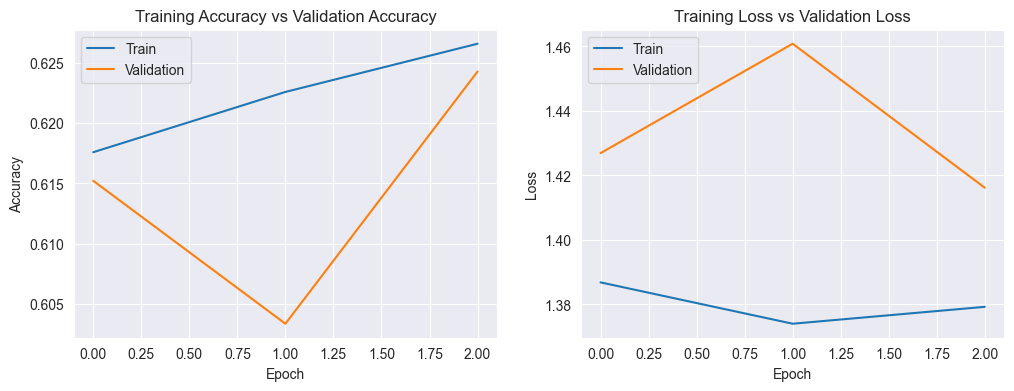

In [34]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.save('model_optimal.h5')

(48, 48)


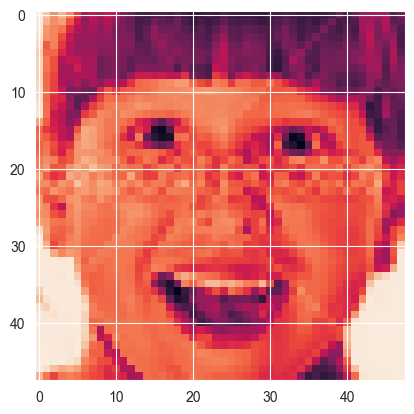

In [41]:
img = image.load_img(r"C:\Users\Gabriel\Documents\Inge-2I\WebScrapping\MasterProject_GIV\EmotionDetector\EmotionDatasets\test\happy\im12.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [42]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [43]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[1.0, 0.0, 1.12141215e-17, 0.0, 0.0, 0.0, 1.2747275e-24]


In [44]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Angry


In [45]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

359/359 ━━━━━━━━━━━━━━━━━━━━ 194s 541ms/step - accuracy: 0.6604 - loss: 1.2809
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 506ms/step - accuracy: 0.6364 - loss: 1.3747
final train accuracy = 65.82 , validation accuracy = 61.52


In [ ]:
model.save_weights('model_weights.h5')

This model is not good enough...

# Second Model  #

In [8]:
# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
model.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,394,183 (5.32 MB)

 Trainable params: 1,391,943 (5.31 MB)

 Non-trainable params: 2,240 (8.75 KB)

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model2-chekpoints.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)


# Train the model with the callback
history = model.fit(
    x=train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback]
)


Epoch 1/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 976ms/step - accuracy: 0.1707 - loss: 2.9287
Epoch 1: val_accuracy improved from -inf to 0.18156, saving model to model2-chekpoints.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 371s 1s/step - accuracy: 0.1708 - loss: 2.9283 - val_accuracy: 0.1816 - val_loss: 1.9491
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 638ms/step - accuracy: 0.2198 - loss: 2.4148
Epoch 2: val_accuracy improved from 0.18156 to 0.33170, saving model to model2-chekpoints.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 233s 647ms/step - accuracy: 0.2199 - loss: 2.4147 - val_accuracy: 0.3317 - val_loss: 1.7368
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.2481 - loss: 2.2476
Epoch 3: val_accuracy improved from 0.33170 to 0.37640, saving model to model2-chekpoints.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 226s 628ms/step - accuracy: 0.2481 - loss: 2.2475 - val_accuracy: 0.3764 - val_loss: 1.6706
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.2859 - l

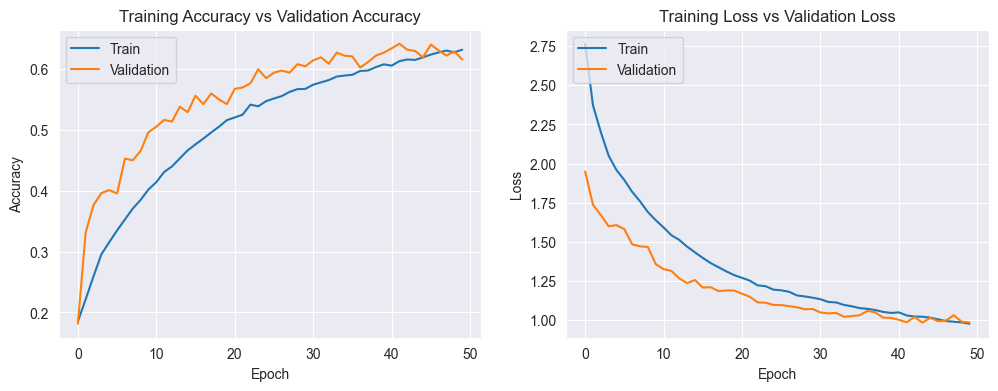

In [11]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [18]:
model.load_weights(r'C:\Users\Gabriel\Documents\Inge-2I\WebScrapping\MasterProject_GIV\EmotionDetector\model2-chekpoints.weights.h5')

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model2.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)


# Train the model with the callback
history = model.fit(
    x=train_generator,
    epochs=120,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback]
)

Epoch 1/120
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.6123 - loss: 1.0304
Epoch 1: val_accuracy improved from -inf to 0.63547, saving model to model2.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 279s 775ms/step - accuracy: 0.6123 - loss: 1.0304 - val_accuracy: 0.6355 - val_loss: 1.0157
Epoch 2/120
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 592ms/step - accuracy: 0.6152 - loss: 1.0258
Epoch 2: val_accuracy did not improve from 0.63547
359/359 ━━━━━━━━━━━━━━━━━━━━ 216s 600ms/step - accuracy: 0.6152 - loss: 1.0257 - val_accuracy: 0.6187 - val_loss: 1.0326
Epoch 3/120
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 592ms/step - accuracy: 0.6204 - loss: 1.0092
Epoch 3: val_accuracy did not improve from 0.63547
359/359 ━━━━━━━━━━━━━━━━━━━━ 216s 600ms/step - accuracy: 0.6204 - loss: 1.0092 - val_accuracy: 0.6285 - val_loss: 1.0253
Epoch 4/120
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 0.6189 - loss: 1.0101
Epoch 4: val_accuracy improved from 0.63547 to 0.63687, saving model to model2.weights.h5
35

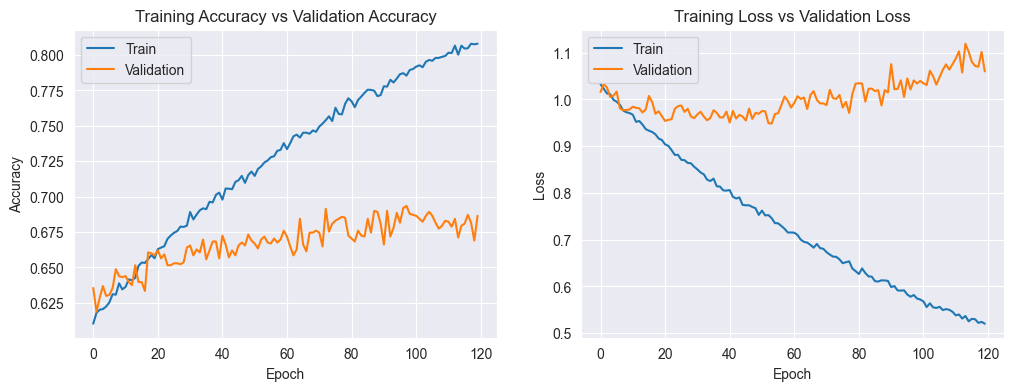

In [19]:

fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12, 4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

(48, 48)


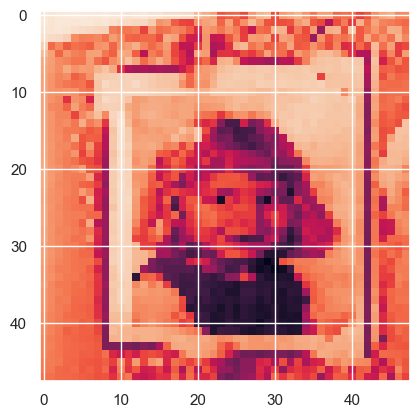

In [48]:
img = image.load_img(r"C:\Users\Gabriel\Downloads\WhatsApp Image 2024-05-14 à 18.53.53_1da56de5.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [49]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [50]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0.9999981, 1.9099307e-06, 0.0, 0.0, 0.0, 0.0, 0.0]


In [51]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Angry


In [25]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

359/359 ━━━━━━━━━━━━━━━━━━━━ 157s 439ms/step - accuracy: 0.8875 - loss: 0.3192
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.6808 - loss: 1.0666
final train accuracy = 89.12 , validation accuracy = 68.65


In [12]:
# Définir le chemin du fichier de checkpoint
checkpoint_path = 'model2-chekpoints.weights.h5'

# Créer le callback pour sauvegarder le meilleur modèle basé sur val_loss
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=True,
    monitor='val_loss',  # Critère d'évaluation pour sauvegarder
    mode='min',  # Sauvegarder si la perte diminue
)

# Entraîner le modèle avec le callback
history = model.fit(
    x=train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback]
)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=model2-chekpoints.weights.h5

### VGG16 ###

In [20]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Charger le modèle VGG16 pré-entraîné sans les couches fully connected (incluez_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 1))

# Ajouter des couches fully connected personnalisées au dessus du modèle VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

# Créer le modèle final en spécifiant les entrées et les sorties
model = Model(inputs=base_model.input, outputs=predictions)

# Optionnel : geler les poids des couches convolutionnelles de VGG16 pour les empêcher d'être réentraînées
for layer in base_model.layers:
    layer.trainable = False


ValueError: The input must have 3 channels; Received `input_shape=(48, 48, 1)`

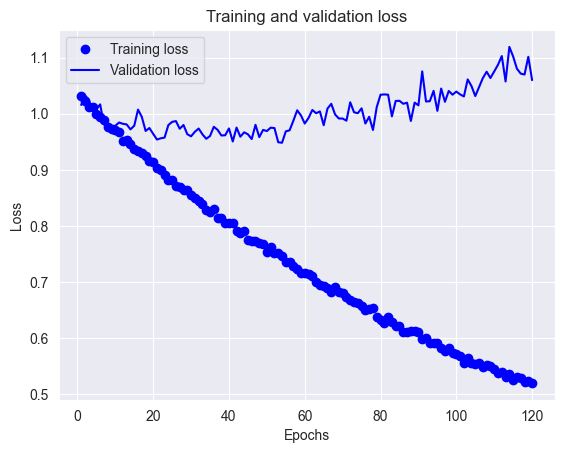

In [34]:
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step


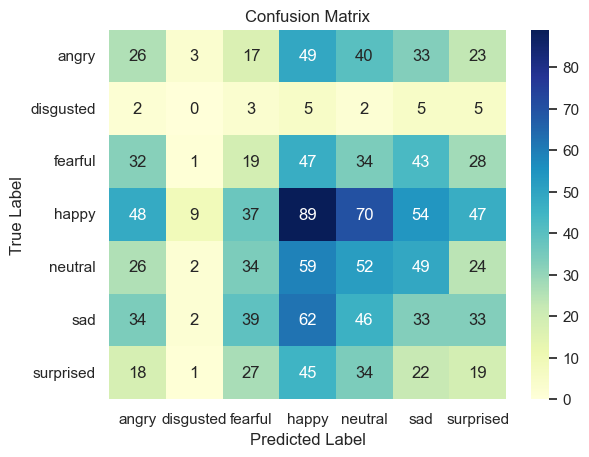

In [35]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()